In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'ieee'])
from scripts import specifications as spec
import os

# Coupling Length Plot

Here you need to know what it means to choose a different r instead of r=1

In [3]:
data_path_CL_v_gap = os.path.join("..", "simulation_data", "coupler_modes.npz")
data_CL_v_gap = np.load(data_path_CL_v_gap)

In [4]:
nss = data_CL_v_gap["nss"]
nas = data_CL_v_gap["nas"]
g_list = data_CL_v_gap["g_list"]
Lcp = spec.λ * 1e-9 / (2 * (np.array(nss) - np.array(nas)))
C = np.pi /(2 * Lcp)
C

array([170957.17656925,  91021.65587488,  49140.96687448,  26615.22234651,
        14436.16485087,   7836.53403299,   4255.91973513,   2311.91622818])

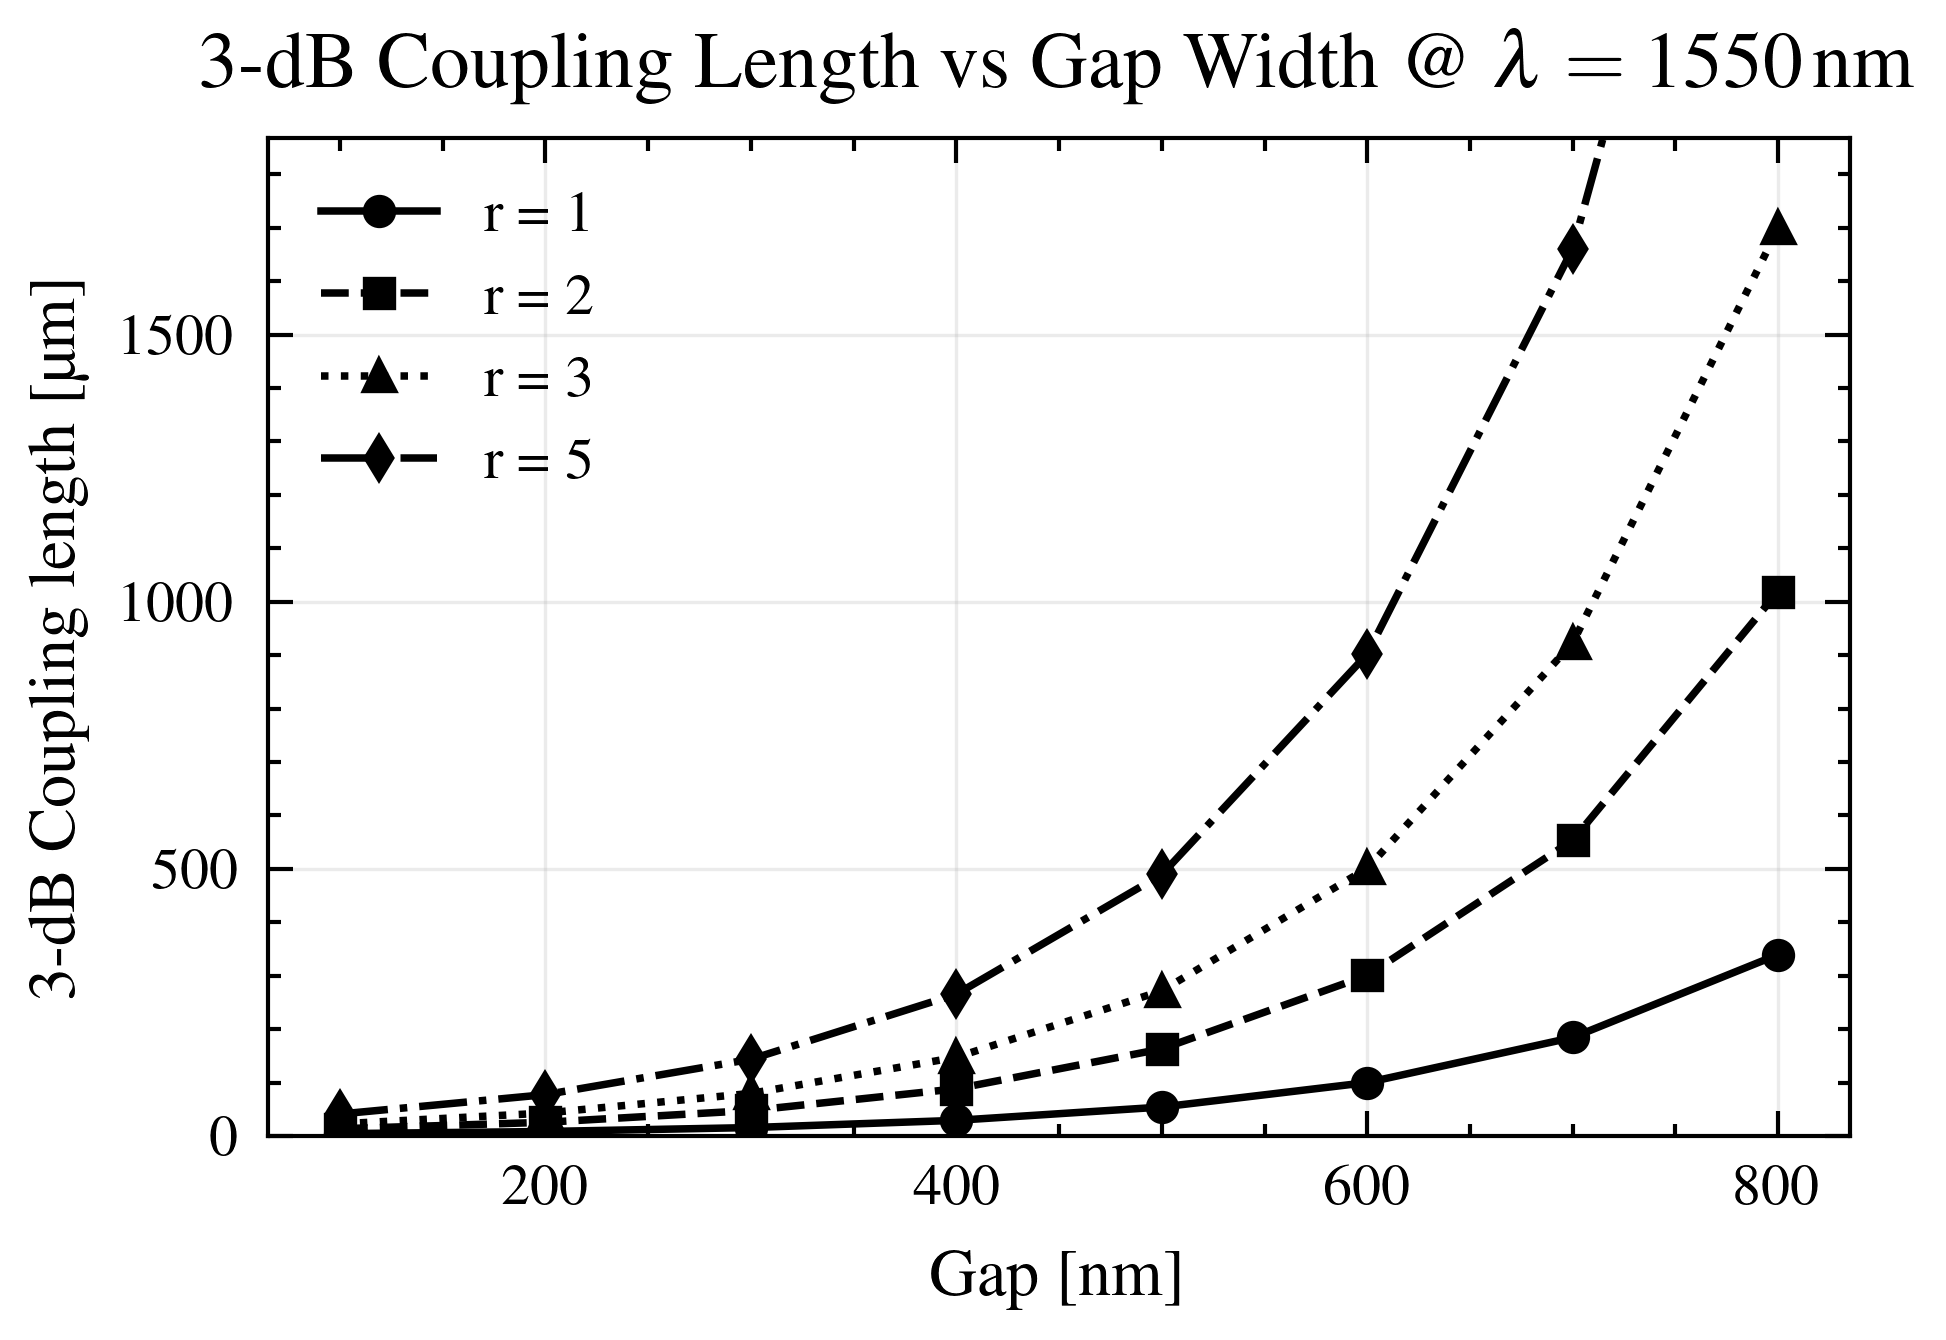

In [5]:
r_values = [1, 2, 3, 5]
L_3db_all = []
for r in r_values:
    L_3db = ((2*r - 1) * np.pi / 4) / C  # [m]
    L_3db_all.append(L_3db * 1e6)        # [µm]
L_3db_all = np.array(L_3db_all)

# Distinct line + marker styles (still black)
styles = [
    ('-', 'o'),
    ('--', 's'),
    (':', '^'),
    ('-.', 'd')
]

plt.figure(figsize=(3.1, 2.2))
for (ls, mk), r, data in zip(styles, r_values, L_3db_all):
    plt.plot(g_list, data, linestyle=ls, marker=mk, color='black',
             markersize=3, linewidth=0.9, label=f'r = {r}')

plt.xlabel("Gap [nm]", fontsize=8)
plt.ylabel("3-dB Coupling length [µm]", fontsize=8)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.grid(True, alpha=0.25, linewidth=0.4)
plt.legend(frameon=False, fontsize=7, handlelength=2)

# 🔹 Scale y-axis to r=3
plt.ylim(0, np.max(L_3db_all[2]) * 1.1)

plt.title(r'3-dB Coupling Length vs Gap Width @ $\lambda = 1550\,\mathrm{nm}$')
plt.tight_layout(pad=0.3)
# plt.savefig('plots/Lc_3db_vs_gap_clean.png', dpi=600, bbox_inches='tight')
plt.show()

# Wavelength dependence

In [6]:
data_path_wavelength_dependence = os.path.join("..", "simulation_data", "DC_wavelength_dependence_g=200.npz")
data_CL_v_lambda = np.load(data_path_wavelength_dependence)

In [7]:

nss = data_CL_v_lambda["nss"]
nas = data_CL_v_lambda["nas"]
wave_legnth_list = data_CL_v_lambda["g_list"]
Lcp = spec.λ * 1e-9 / (2 * (np.array(nss) - np.array(nas)))
C = np.pi /(2 * Lcp)

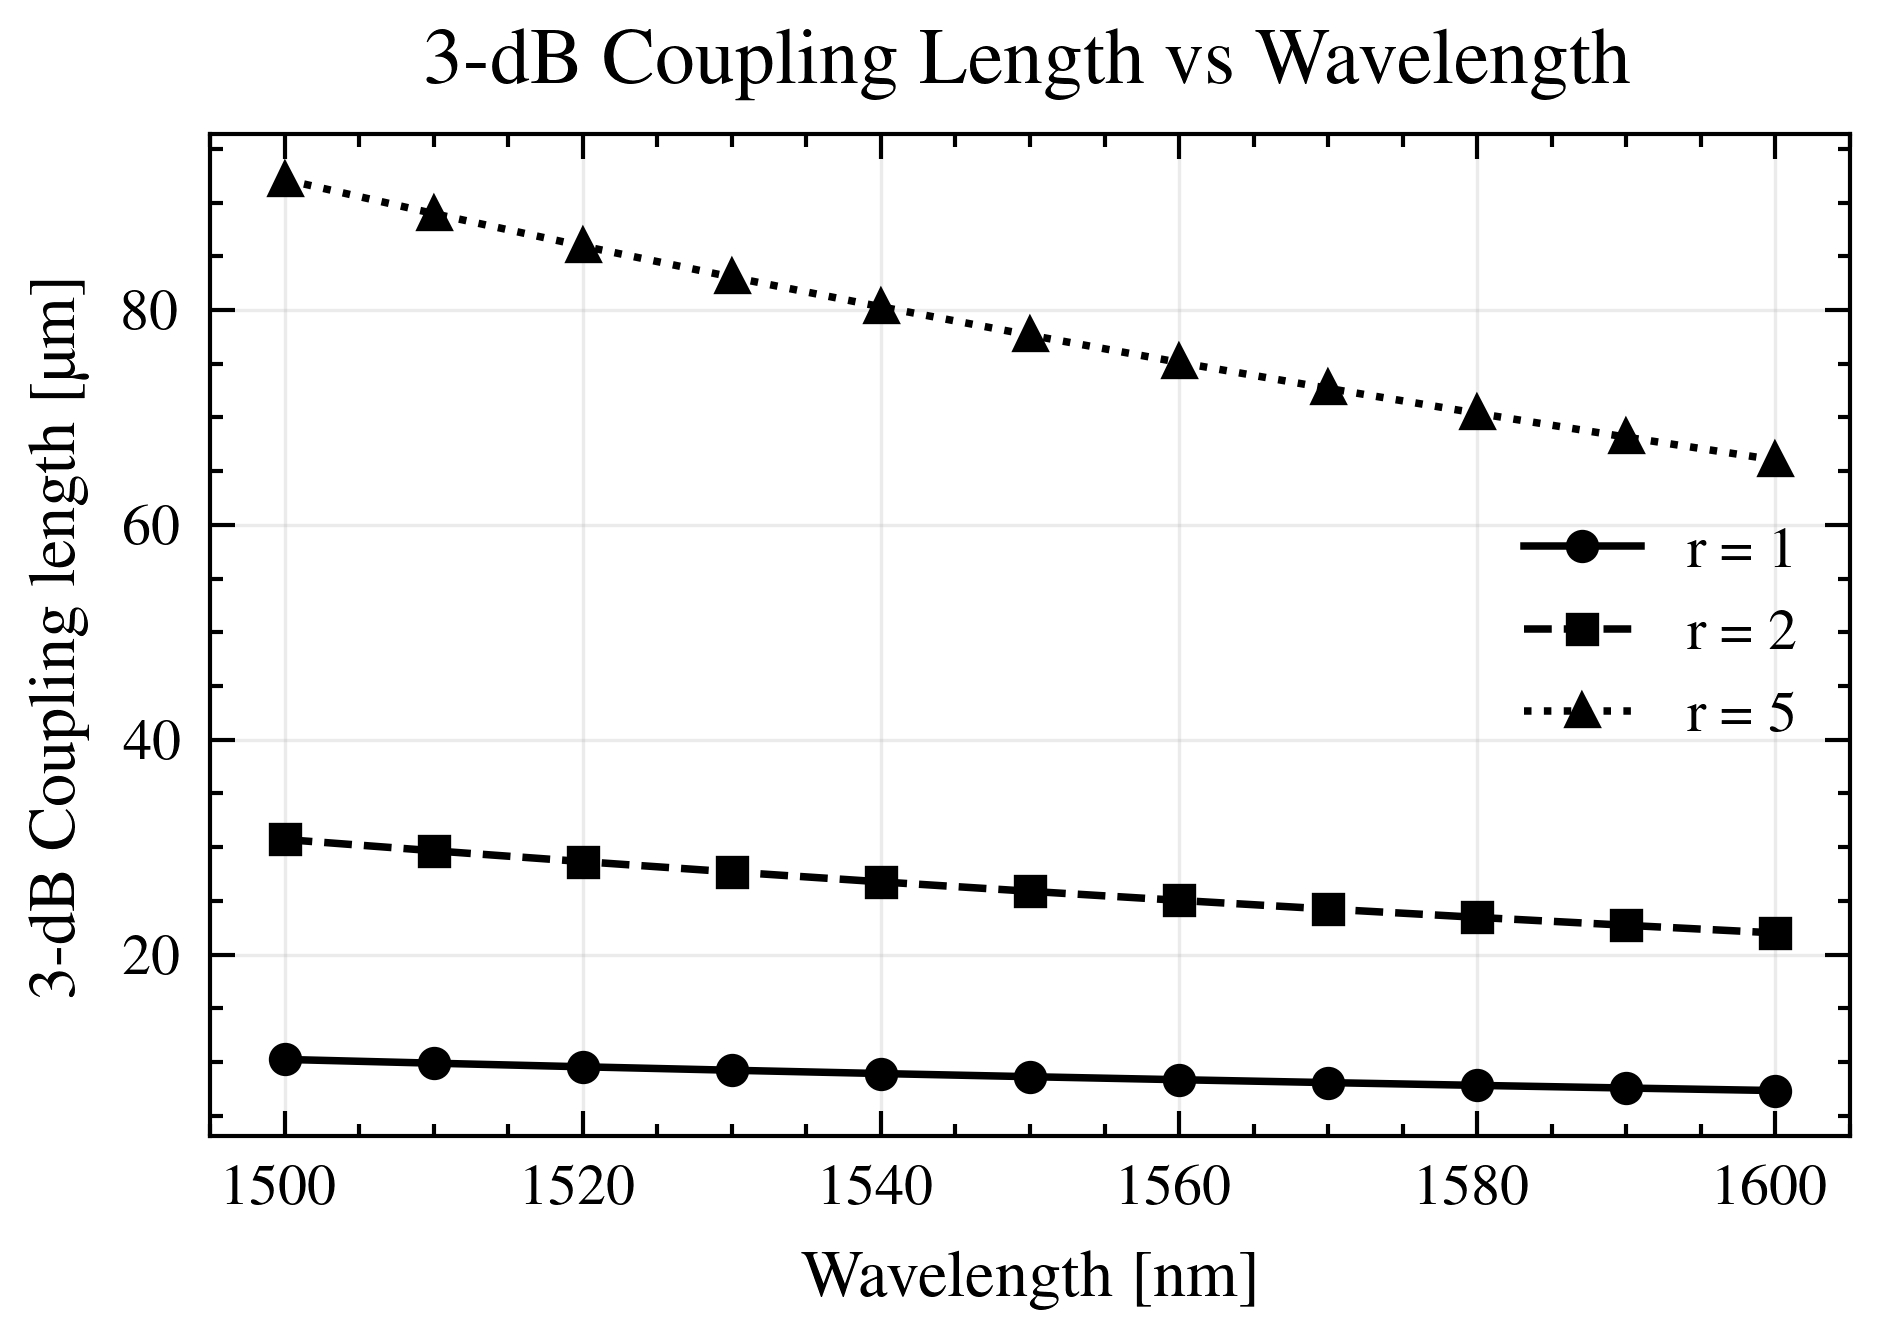

In [8]:
r_values = [1, 2, 5]
L_3db_all = []
for r in r_values:
    L_3db = ((2*r - 1) * np.pi / 4) / C  # [m]
    L_3db_all.append(L_3db * 1e6)        # [µm]
L_3db_all = np.array(L_3db_all)

# Distinct line + marker styles (still black)
styles = [
    ('-', 'o'),
    ('--', 's'),
    (':', '^'),
    ('-.', 'd')
]

plt.figure(figsize=(3.1, 2.2))
for (ls, mk), r, data in zip(styles, r_values, L_3db_all):
    plt.plot(wave_legnth_list, data, linestyle=ls, marker=mk, color='black',
             markersize=3, linewidth=0.9, label=f'r = {r}')

plt.xlabel("Wavelength [nm]", fontsize=8)
plt.ylabel("3-dB Coupling length [µm]", fontsize=8)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.grid(True, alpha=0.25, linewidth=0.4)
plt.legend(frameon=False, fontsize=7, handlelength=2)


plt.title(r'3-dB Coupling Length vs Wavelength')
plt.tight_layout(pad=0.3)
# plt.savefig('plots/Lc_3db_vs_gap_clean.png', dpi=600, bbox_inches='tight')
plt.show()

# Second order Cutoff 

In [9]:
data_path_second_order_cutoff = os.path.join("..", "simulation_data", "DC_second_order_cut_off_g=200.npz")
data_second_order_cutoff = np.load(data_path_second_order_cutoff)

wavelength_list = data_second_order_cutoff["wavelength_list"]
nss_1 = data_second_order_cutoff["nss_1st_order"]
nas_1 = data_second_order_cutoff["nas_1st_order"]
nss_2 = data_second_order_cutoff["nss_2nd_order"]
nas_2 = data_second_order_cutoff["nas_2nd_order"]
nss_3 = data_second_order_cutoff["nss_3rd_order"]
nas_3 = data_second_order_cutoff["nas_3rd_order"]


In [10]:
Δn1 = nss_1 - nas_1
Δn2 = nss_2 - nas_2
Δn3 = nss_3 - nas_3

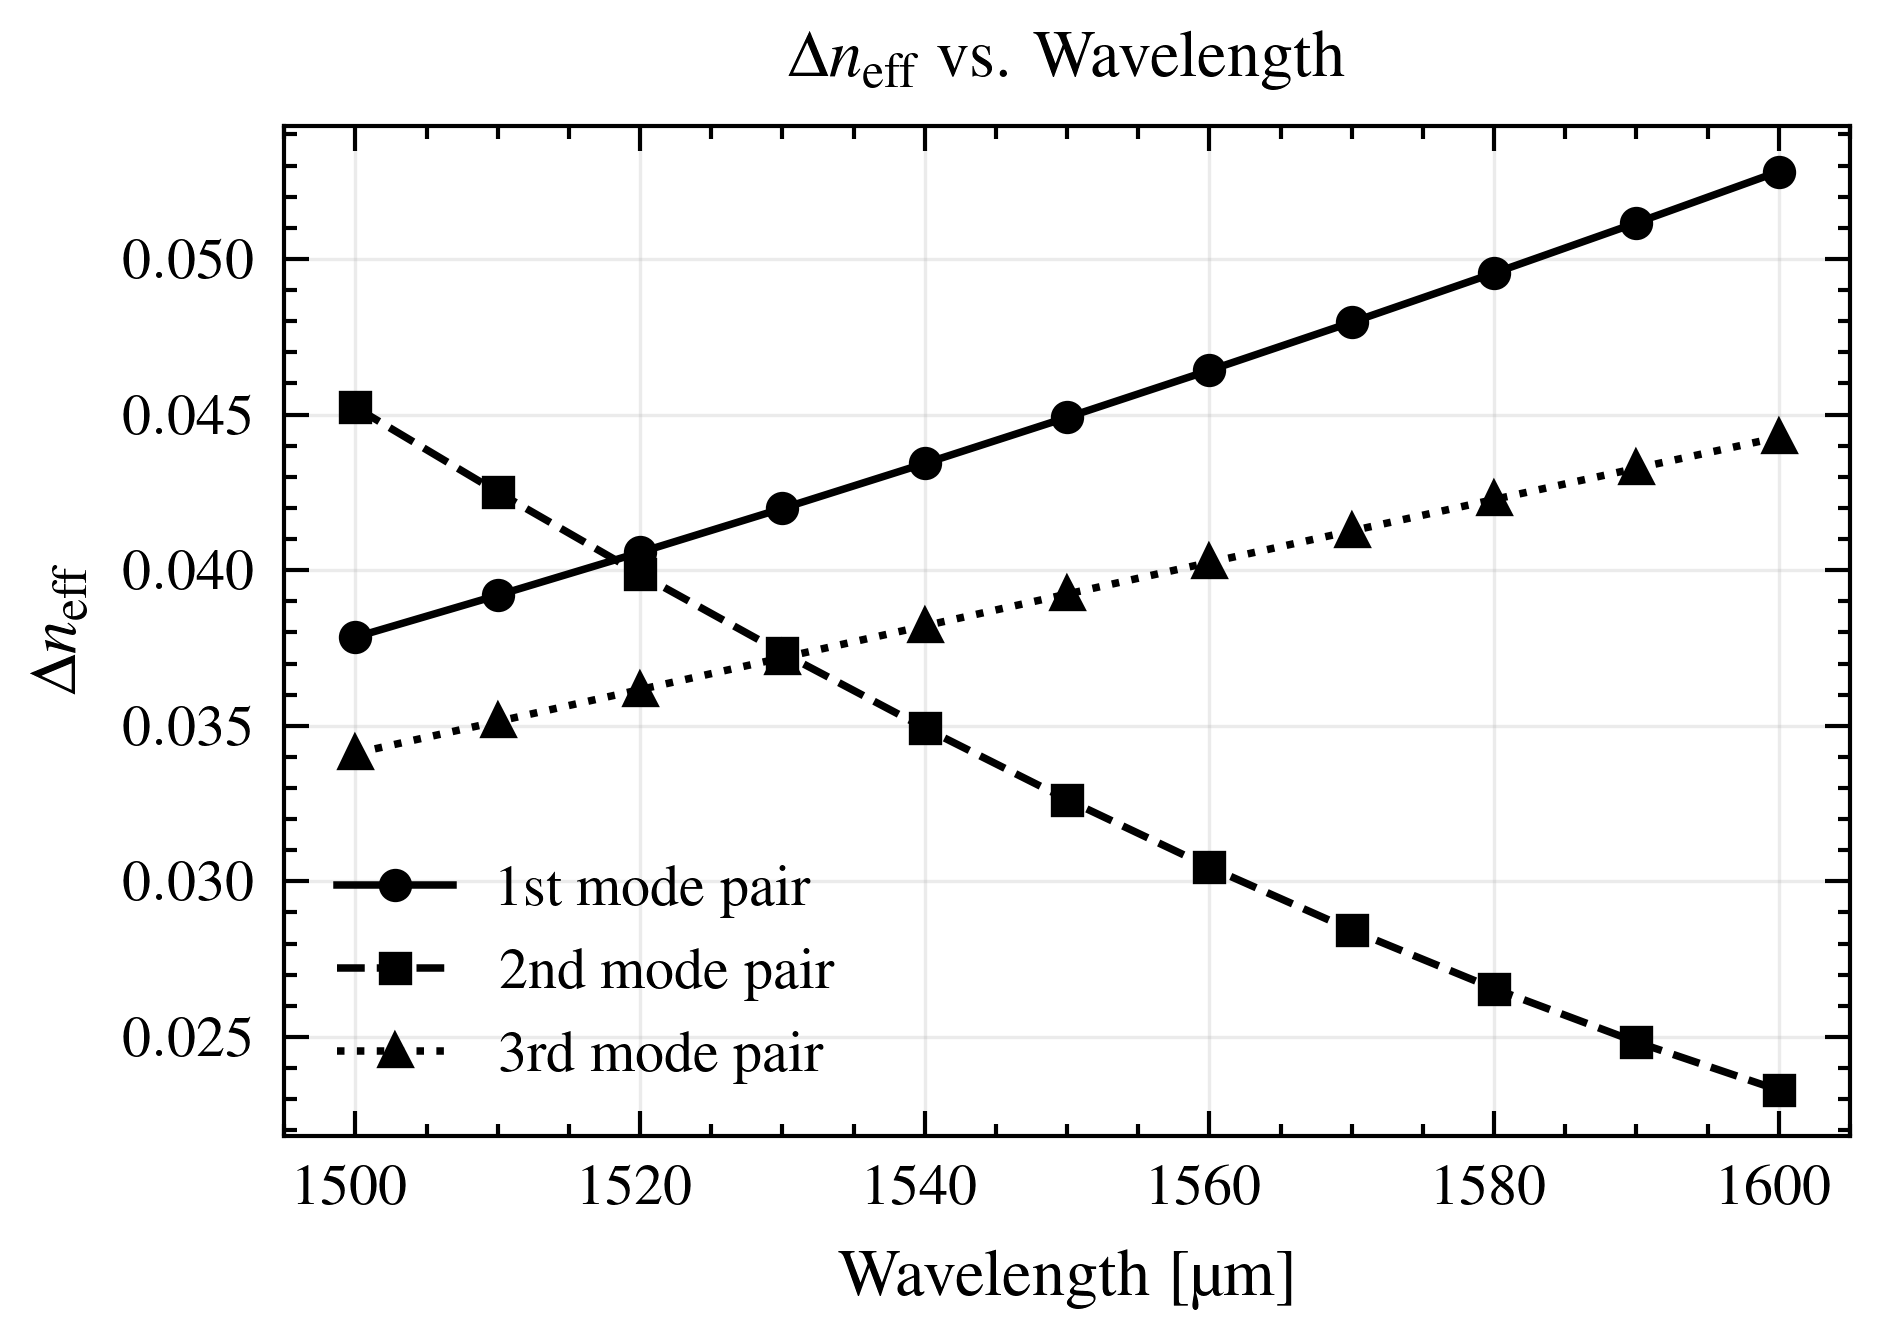

In [11]:
styles = [
    ('-', 'o'),
    ('--', 's'),
    (':', '^')
]

Δn_all = [Δn1, Δn2, Δn3]
labels = ['1st mode pair', '2nd mode pair', '3rd mode pair']

plt.figure(figsize=(3.1, 2.2))

for (ls, mk), Δn, label in zip(styles, Δn_all, labels):
    plt.plot(wavelength_list, Δn,
             linestyle=ls, marker=mk, color='black',
             markersize=3, linewidth=0.9, label=label)

plt.xlabel("Wavelength [µm]", fontsize=8)
plt.ylabel(r"$\Delta n_\mathrm{eff}$", fontsize=8)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.grid(True, alpha=0.25, linewidth=0.4)
plt.legend(frameon=False, fontsize=7, handlelength=2)
plt.title(r'$\Delta n_\mathrm{eff}$ vs. Wavelength', fontsize=8)
plt.tight_layout(pad=0.3)
plt.show()


# Monte Carlo Sampling

Loaded: C:\Users\phill\OneDrive\Skole\Kandidat\1.Semester\Photonic Integrated Circuit Design\Projects\My Project\optical_couplers\simulation_data\coupler_montecarlo_KPD.npz
Samples = 400


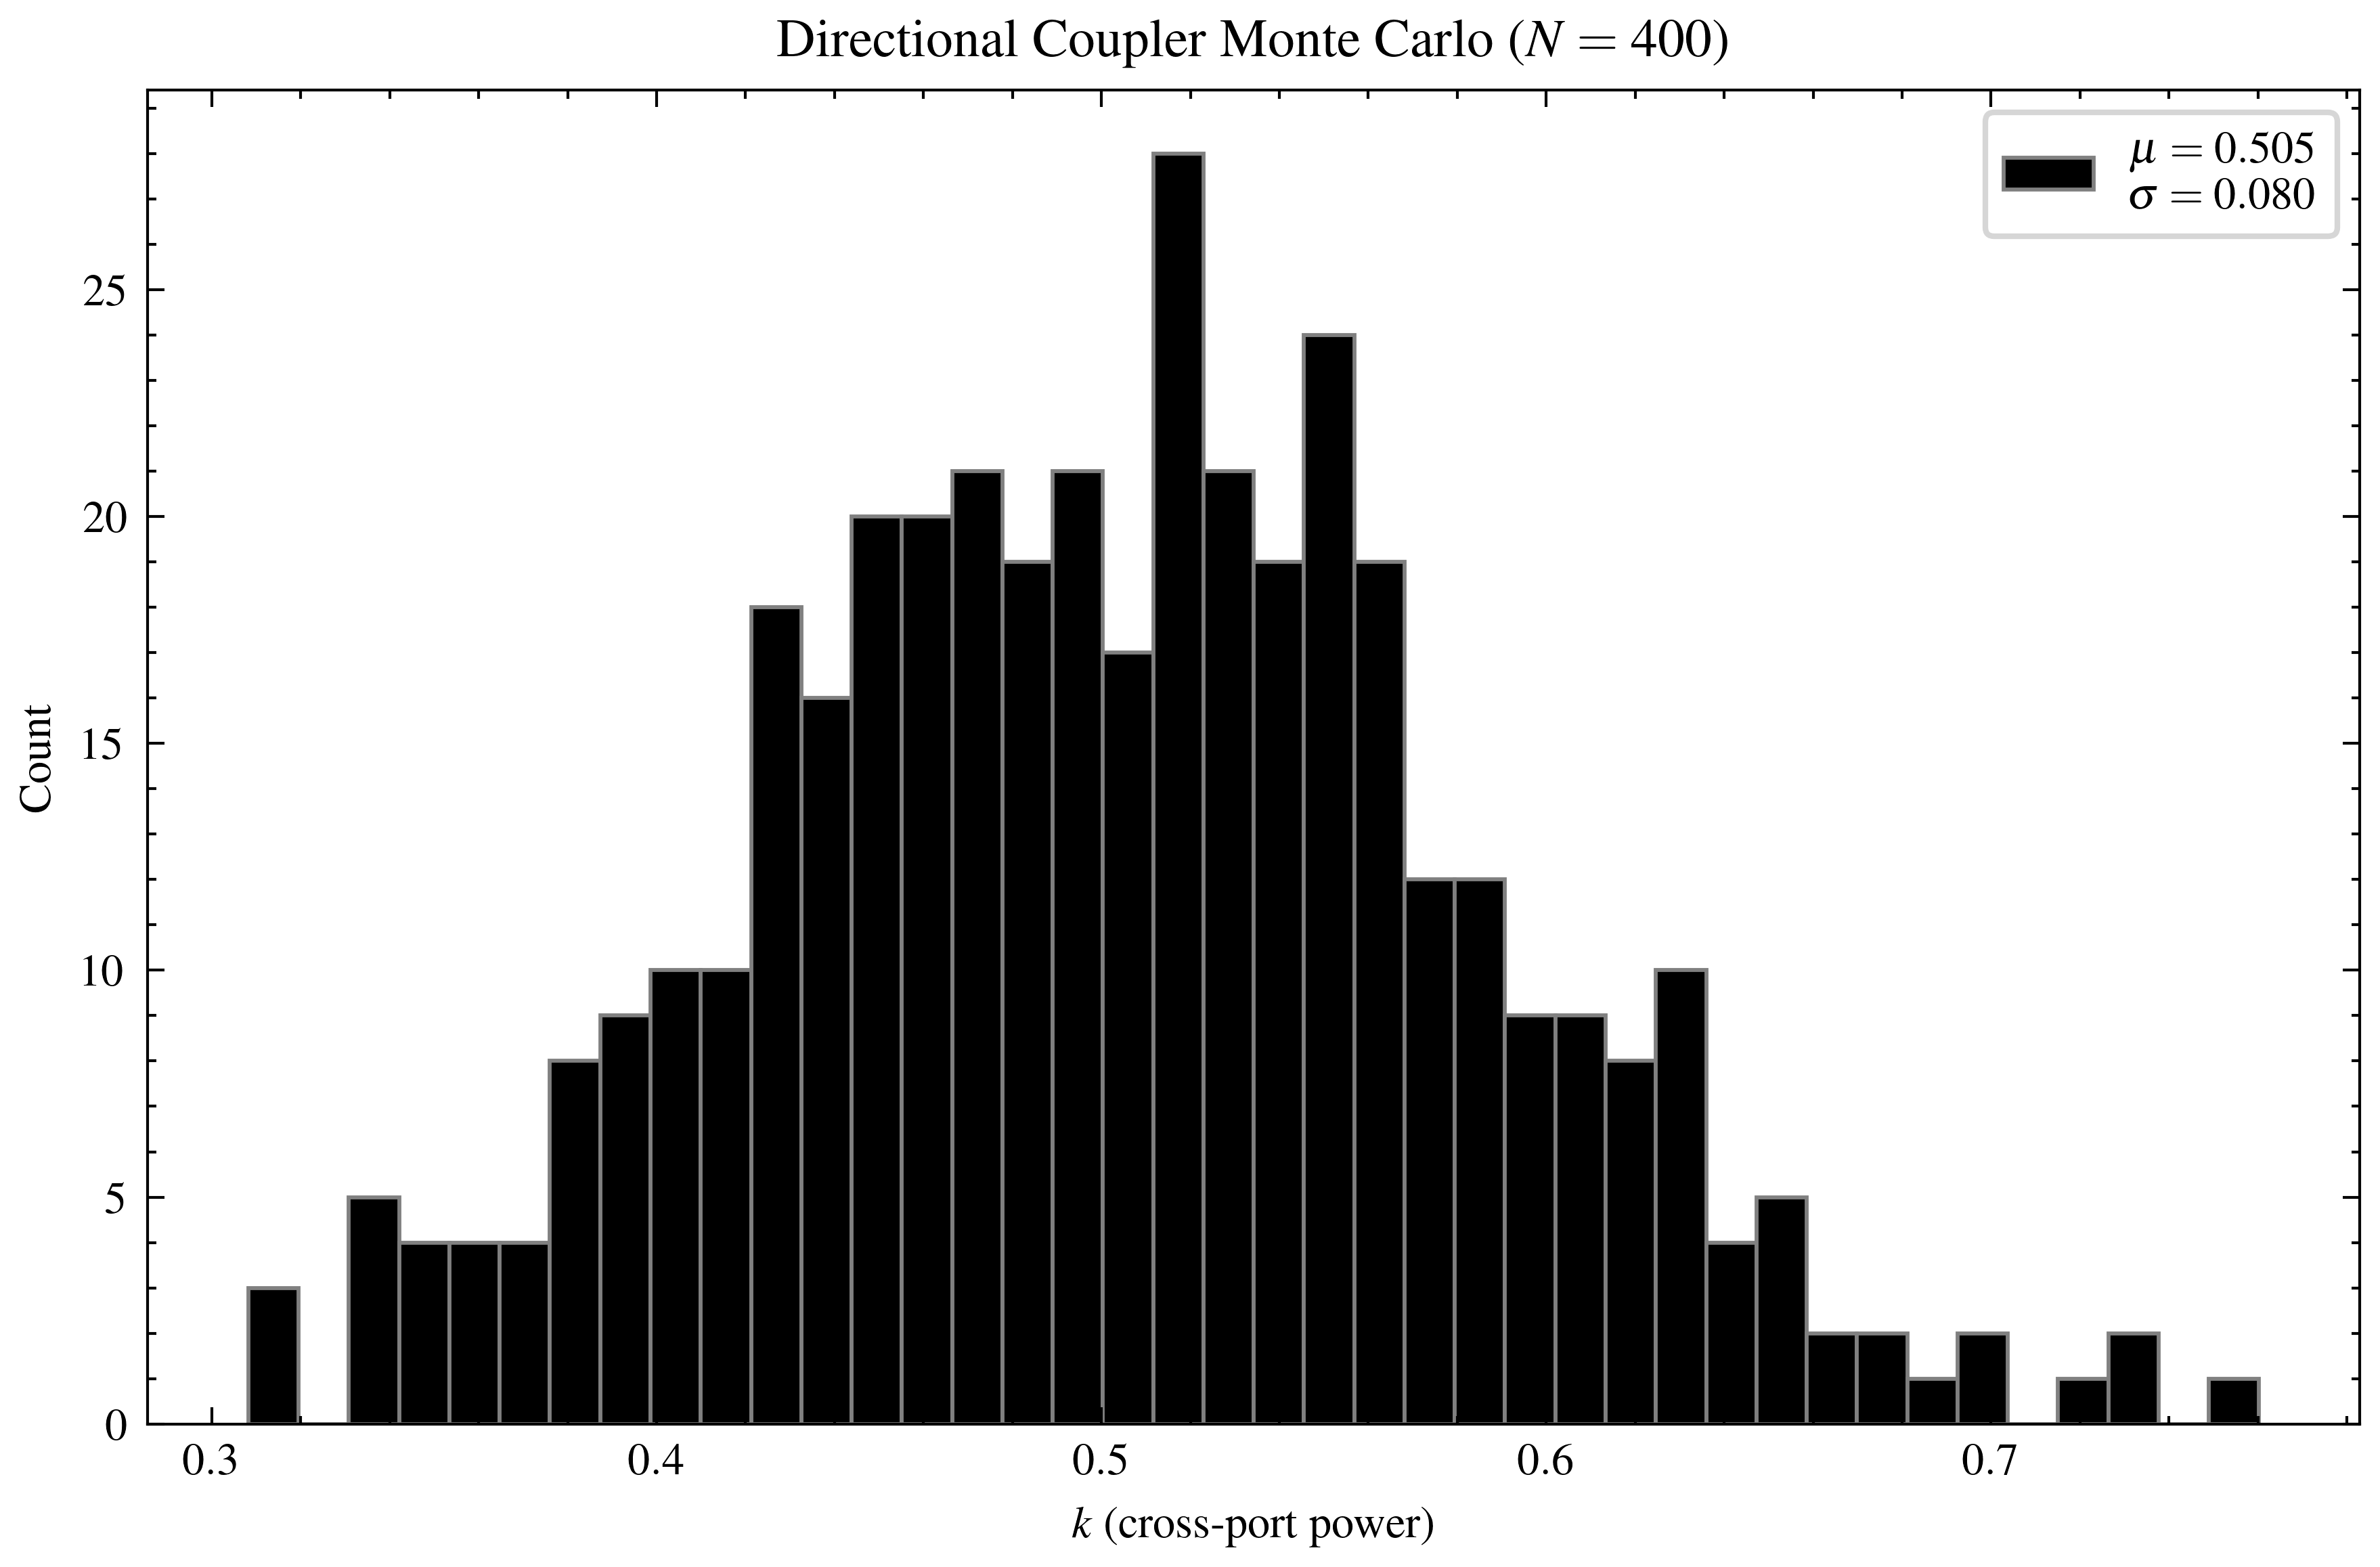

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(["science", "ieee"])

# ==============================
# Load Monte-Carlo data
# ==============================
DATA_PATH = r"C:\Users\phill\OneDrive\Skole\Kandidat\1.Semester\Photonic Integrated Circuit Design\Projects\My Project\optical_couplers\simulation_data\coupler_montecarlo_KPD.npz"
data = np.load(DATA_PATH)

KPD = data["KPD"]
k   = data["k"]
N_SAMPLES = len(k)

print("Loaded:", DATA_PATH)
print(f"Samples = {N_SAMPLES}")

# ==============================
# Histogram of k
# ==============================

mean_val = np.mean(k)
std_val  = np.std(k)

plt.figure(figsize=(6,4))
plt.hist(
    k,
    bins=40,
    edgecolor="grey",       # DEFINES BIN LINES
    linewidth=0.7,           # ensures visible separation
)

plt.xlabel(r"$k$ (cross-port power)")
plt.ylabel(r"Count")
plt.title(rf"Directional Coupler Monte Carlo ($N={N_SAMPLES}$)")

# Legend with mean + std
plt.legend(
    [rf"$\mu = {mean_val:.3f}$" + "\n" + rf"$\sigma = {std_val:.3f}$"],
    frameon=True,
)

plt.tight_layout()
plt.show()
